In [1]:
import pypianoroll
import numpy as np
import os


os.sys.path.append(os.path.abspath('..'))

from utils import *

from sklearn.preprocessing import OneHotEncoder
import pandas as pd


(<Figure size 432x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1884e4cbcc0>])

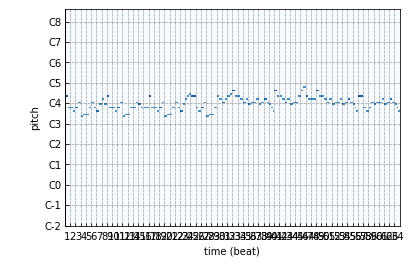

In [2]:
roll = pypianoroll.Multitrack("D:\data\\folkdataset\sessiontune10.mid")

roll.plot()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1884e89bf28>)

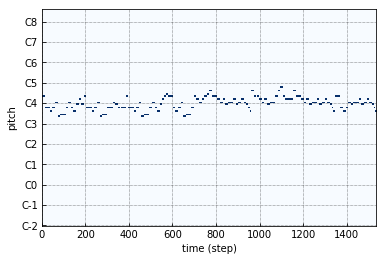

In [3]:
track = roll.tracks[0]
track.binarize()
track.plot()

In [6]:
track_min, track_max = track.get_active_pitch_range()
track_min, track_max

(64, 81)

In [7]:
empty = track.pianoroll[:200,0]
empty = empty.reshape((-1,1))

In [8]:
section = track.pianoroll[:200,track_min:track_max]
section.shape

(200, 17)

In [9]:
withrests = np.hstack(
    [
        empty,
        section,
    ]
)
df = pd.DataFrame(withrests)

In [10]:
withrests.shape

(200, 18)

In [11]:
zeros_down = np.zeros((200,track_min-1))
zeros_down.shape

zeros_above = np.zeros((200,128-track_max))
zeros_above.shape

reconstruction = np.hstack(
    [
        empty,
        zeros_down,
        section,
        zeros_above        
    ]

)

reconstruction.shape

(200, 63)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1884fa26438>)

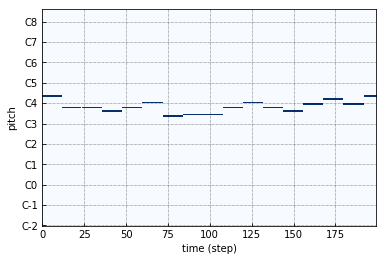

In [14]:
reconstruction_track = pypianoroll.Track(reconstruction)
reconstruction_track.plot()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1884fa41ef0>)

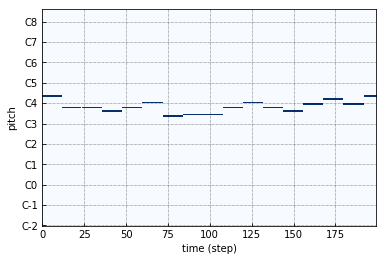

In [15]:
original = pypianoroll.Track(track.pianoroll[:200])
original.plot()

In [18]:
np.unique(reconstruction_track.pianoroll == original.pianoroll)

array([ True])